# Práctica 6 – Clasificación con KNN (Anime Dataset)

En esta práctica vamos a:
- Crear clases de **rating** (Alta, Media, Baja).
- Entrenar un modelo **KNN** para clasificar animes.
- Medir exactitud (accuracy).
- Mostrar matriz de confusión.
- Interpretar resultados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("../data/Anime_clean.csv")
df.head()


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1.0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,24.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2.0,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3.0,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5.0,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [2]:
def categorize_rating(r):
    if r >= 8:
        return "Alta"
    elif r >= 6:
        return "Media"
    else:
        return "Baja"

df["Rating_Class"] = df["Rating"].apply(categorize_rating)

df["Rating_Class"].value_counts()


Rating_Class
Baja    15344
Name: count, dtype: int64

In [3]:
X = df[["Episodes", "Release_year", "Rank"]]
y = df["Rating_Class"]

# Eliminar filas con NaN
data = pd.concat([X, y], axis=1)
data = data.dropna(subset=["Episodes", "Release_year", "Rank", "Rating_Class"])

X = data[["Episodes", "Release_year", "Rank"]]
y = data["Rating_Class"]

X.shape, y.shape


((8482, 3), (8482,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape


((6361, 3), (2121, 3))

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc


1.0

C:\Users\hmisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


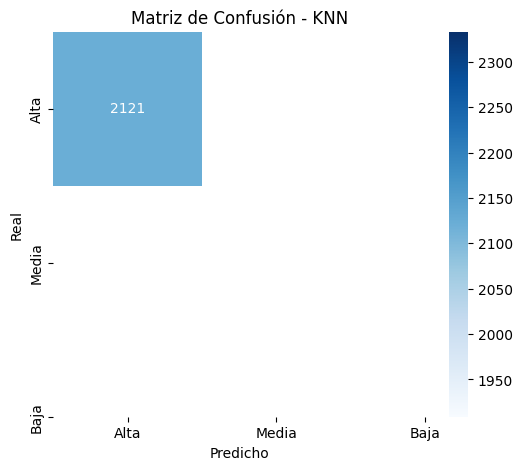

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Alta", "Media", "Baja"],
            yticklabels=["Alta", "Media", "Baja"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        Baja       1.00      1.00      1.00      2121

    accuracy                           1.00      2121
   macro avg       1.00      1.00      1.00      2121
weighted avg       1.00      1.00      1.00      2121



In [9]:
results = {}

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc_k = accuracy_score(y_test, model.predict(X_test))
    results[k] = acc_k

results


{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0}

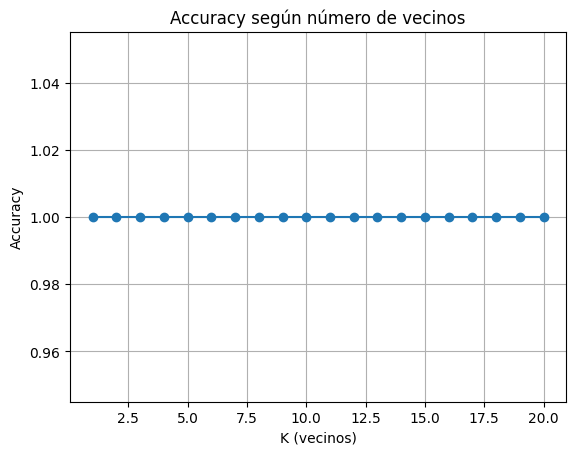

In [10]:
plt.plot(list(results.keys()), list(results.values()), marker="o")
plt.xlabel("K (vecinos)")
plt.ylabel("Accuracy")
plt.title("Accuracy según número de vecinos")
plt.grid()
plt.show()
